<a href="https://colab.research.google.com/github/poet1010/colab/blob/main/Comparing_3_teams.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pybaseball

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 420.0/420.0 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 312.5/312.5 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 856.7/856.7 kB 39.9 MB/s eta 0:00:00


Comparing the Dominance of Three of the Best All-Time Teams

In [2]:
from pybaseball import schedule_and_record
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
yankees = schedule_and_record(1927, 'NYY')
reds = schedule_and_record(1976, 'CIN')
mariners = schedule_and_record(2001, 'SEA')

http://www.baseball-reference.com/teams/NYY/1927-schedule-scores.shtml
http://www.baseball-reference.com/teams/CIN/1976-schedule-scores.shtml
http://www.baseball-reference.com/teams/SEA/2001-schedule-scores.shtml


In [4]:
mariners.describe()

,R,RA,Inn,Rank,Attendance,Streak
count,162.000000,162.000000,162.000000,162.0,162.000000,162.000000
mean,5.722222,3.870370,9.166667,1.0,37564.376543,2.080247
std,3.406698,3.009589,0.680245,0.0,10771.969761,3.315648
min,0.000000,0.000000,9.000000,1.0,11687.000000,-4.000000
25%,3.000000,2.000000,9.000000,1.0,30071.000000,-1.000000
50%,5.000000,3.000000,9.000000,1.0,42362.000000,2.000000
75%,8.000000,5.000000,9.000000,1.0,45651.750000,3.000000
max,16.000000,15.000000,14.000000,1.0,61065.000000,15.000000


In [5]:
reds.describe()

,R,RA,Inn,Rank,Attendance,Streak
count,162.000000,162.000000,162.000000,162.000000,154.000000,162.000000
mean,5.290123,3.907407,9.246914,1.135802,29033.474026,0.839506
std,3.330048,2.797083,1.033968,0.361264,13331.318368,2.084887
min,0.000000,0.000000,7.000000,1.000000,5219.000000,-4.000000
25%,3.000000,2.000000,9.000000,1.000000,18227.250000,-1.000000
50%,5.000000,3.000000,9.000000,1.000000,28114.000000,1.000000
75%,7.000000,5.000000,9.000000,1.000000,38292.500000,2.000000
max,14.000000,14.000000,16.000000,3.000000,53652.000000,7.000000


In [6]:
yankees.describe()

,R,RA,Inn,Rank,Attendance,Streak
count,155.000000,155.000000,155.000000,155.0,135.000000,155.000000
mean,6.290323,3.864516,9.103226,1.0,19541.244444,1.735484
std,3.939424,2.817103,0.968157,0.0,14751.183499,2.588881
min,0.000000,0.000000,5.000000,1.0,1500.000000,-4.000000
25%,3.000000,2.000000,9.000000,1.0,8000.000000,-1.000000
50%,6.000000,3.000000,9.000000,1.0,15000.000000,2.000000
75%,8.000000,6.000000,9.000000,1.0,25000.000000,3.000000
max,21.000000,14.000000,18.000000,1.0,72641.000000,9.000000


In [7]:
# create a numeric indicator of a win and take cumulative sum of wins-to-date at each point in the season
mariners['win-count'] = np.where(mariners['W/L']=='W', 1, 0).cumsum()
yankees['win-count'] = np.where(yankees['W/L']=='W', 1, 0).cumsum()
reds['win-count'] = np.where(reds['W/L']=='W', 1, 0).cumsum()

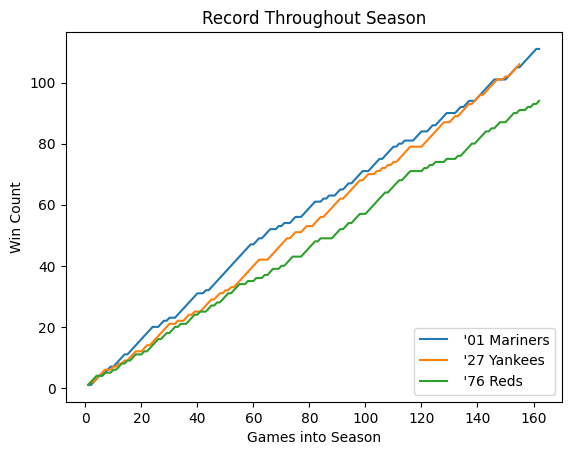

In [8]:
plt.plot(mariners['win-count'],label=" '01 Mariners")
plt.plot(yankees['win-count'],label=" '27 Yankees")
plt.plot(reds['win-count'],label=" '76 Reds")
plt.legend(loc=4)
plt.xlabel('Games into Season')
plt.ylabel('Win Count')
plt.title('Record Throughout Season');

In [9]:
mariners['scorediff'] = (mariners['R'] - mariners['RA']).cumsum()
yankees['scorediff'] = (yankees['R'] - yankees['RA']).cumsum()
reds['scorediff'] = (reds['R'] - reds['RA']).cumsum()

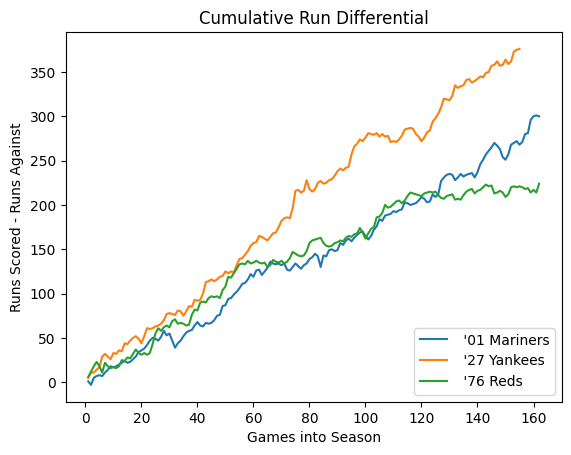

In [10]:
plt.plot(mariners['scorediff'],label=" '01 Mariners")
plt.plot(yankees['scorediff'],label=" '27 Yankees")
plt.plot(reds['scorediff'],label=" '76 Reds")
plt.legend(loc=4)
plt.xlabel('Games into Season')
plt.ylabel('Runs Scored - Runs Against')
plt.title('Cumulative Run Differential');